In [1]:
import pandas as pd       # importing dataframes and series
import numpy as np       
import os
import matplotlib.pyplot as plt    #data visualtisation
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


In [2]:
os.getcwd()

'C:\\Users\\RakeshS\\Documents\\python\\data sc\\logistic reg\\HR Attrition'

In [3]:
hr=pd.read_excel("HR Attrition (2).xlsx")

In [4]:
hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr.shape 

(1470, 35)

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null object
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
hr.describe()  #statistical summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Label is Attrition so converting it into 0 and 1 with replace function.
hr["Attrition"]=hr.Attrition.replace(to_replace=["Yes",'No'],value=[1,0])   

In [9]:
hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
hr.tail(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,0,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Missing value

In [11]:
hr.isnull().sum()  #No missing value is present in dataset.

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

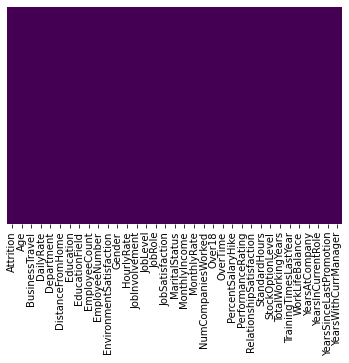

In [12]:
ax=sns.heatmap(hr.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap="viridis")


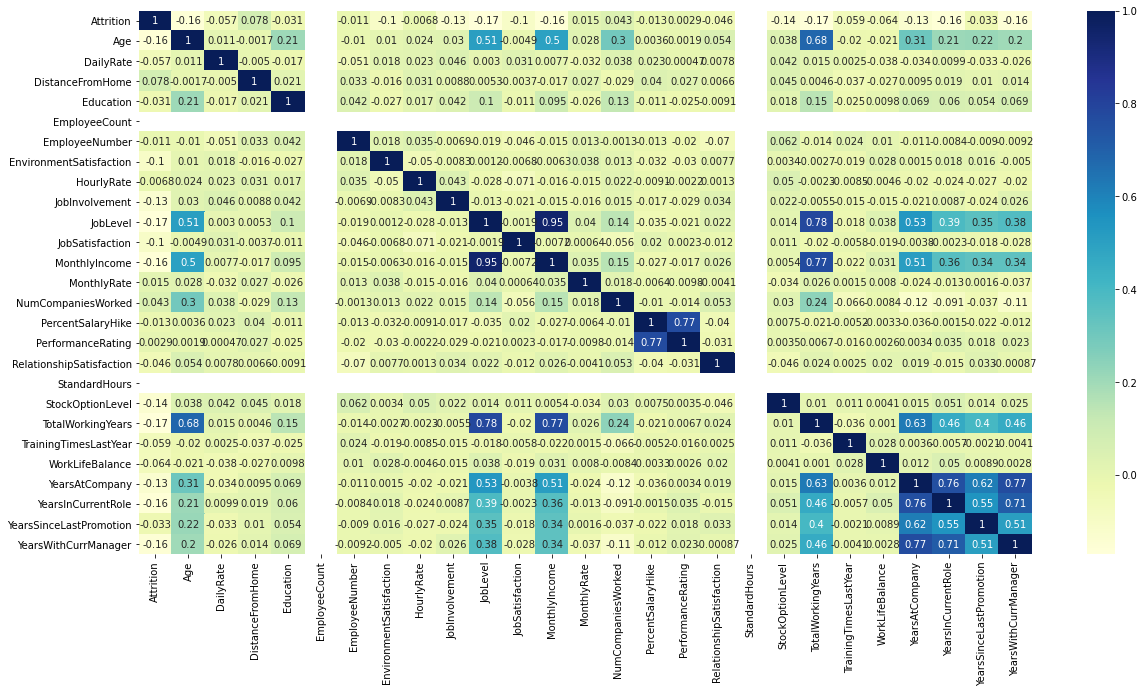

In [13]:
plt.figure(figsize=[20, 10])
sns.heatmap(hr.corr(),annot=True, cmap="YlGnBu")

# Univariate Analysis

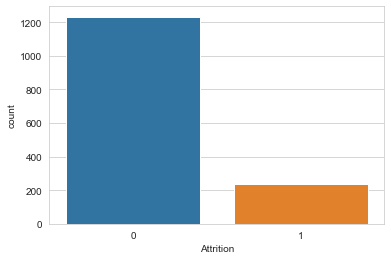

In [14]:
sns.set_style("whitegrid")          
sns.countplot(x="Attrition", data=hr)

In [15]:
hr.Attrition.value_counts() 
#0 - NOT LEAVING THE COMPANY
#1 - LEAVING THE COMPANY

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
hr.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

# IDENTIFICATION OF OUTLIER

In [17]:
print(hr['Age'].skew())    
hr.Age.describe()

0.4132863018563338


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

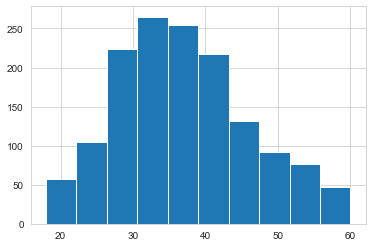

In [18]:
hr.Age.hist() 

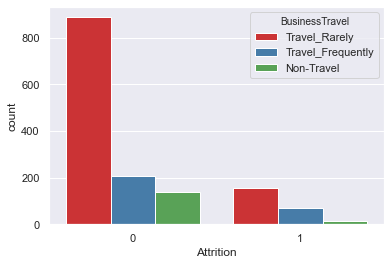

In [19]:
sns.set(palette='Set1')
sns.countplot(x="Attrition",hue="BusinessTravel",data=hr)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

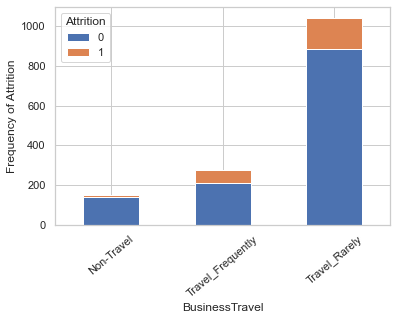

In [20]:
sns.set(style="whitegrid")
pd.crosstab(hr.BusinessTravel,hr.Attrition).plot(kind='bar', stacked=True)

plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

In [21]:
hr.BusinessTravel.value_counts(normalize=True)

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

In [22]:
hr.groupby(['Attrition']).agg({'DailyRate': 'mean'})

,DailyRate
Attrition,
0,812.504461
1,750.362869


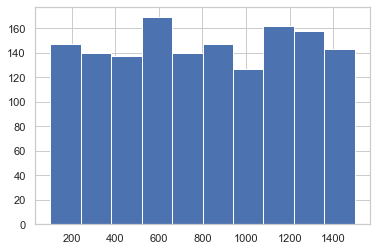

In [23]:
hr.DailyRate.hist()

In [24]:
hr.Department.value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

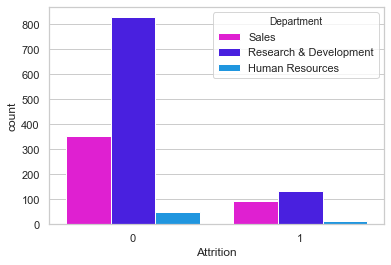

In [25]:
sns.set(style='whitegrid',palette='hsv_r') 
sns.countplot(x="Attrition",hue="Department",data=hr)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

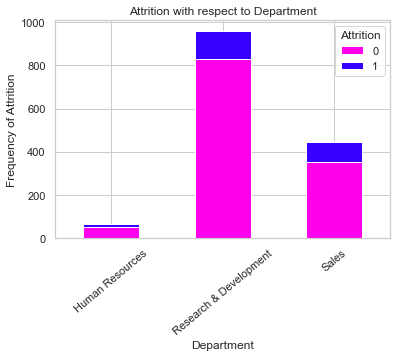

In [26]:
pd.crosstab(hr.Department,hr.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

In [27]:
print(hr.DistanceFromHome.skew())   # for outlier (-1 to +1)
hr.DistanceFromHome.describe()

0.9581179956568269


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

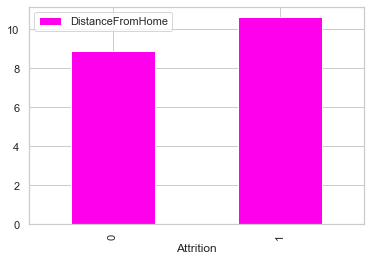

In [28]:
hr.groupby(['Attrition']).agg({'DistanceFromHome': 'mean'}).plot(kind="bar", stacked= True)

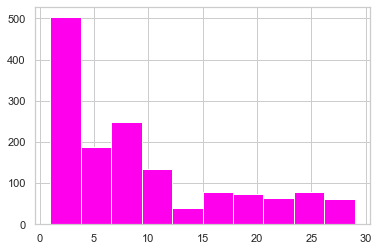

In [29]:
hr.DistanceFromHome.hist()

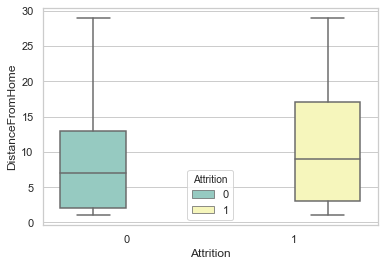

In [30]:
ax = sns.boxplot(x="Attrition", y="DistanceFromHome", hue="Attrition",
                 data=hr, palette="Set3")

In [31]:
hr.Education.value_counts(normalize=True)    
#1 'Below College'
#2 'College'
#3 'Bachelor'
#4 'Master'
#5 'Doctor'

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64

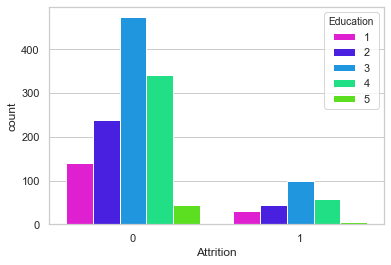

In [32]:
sns.countplot(x="Attrition",hue="Education",data=hr)

In [33]:
hr.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

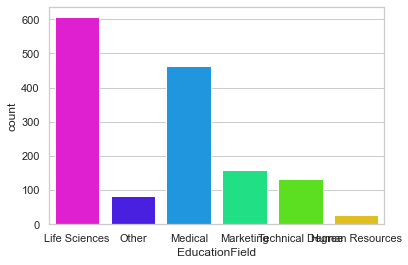

In [34]:
sns.countplot(x="EducationField",data=hr)

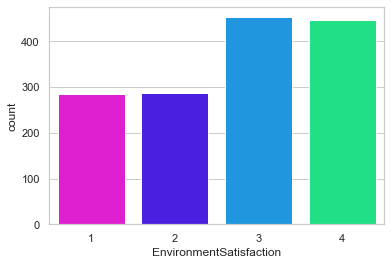

In [35]:
sns.countplot(x="EnvironmentSatisfaction",data=hr)
#1 'Low'
#2 'Medium'
#3 'High'
#4 'Very High'

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

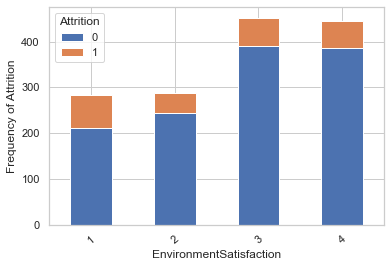

In [36]:
sns.set(style="whitegrid")
#hr[EnvironmentSatisfaction]=hr.EnvironmentSatisfaction.replace(to_replace=[1,2,3,4],value=['Low', 'Medium', 'High', 'Very High'])
pd.crosstab(hr.EnvironmentSatisfaction,hr.Attrition).plot(kind='bar', stacked=True)


plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

In [37]:
hr.EnvironmentSatisfaction.value_counts(normalize=True)

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

In [38]:
hr.Gender.value_counts(normalize=True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

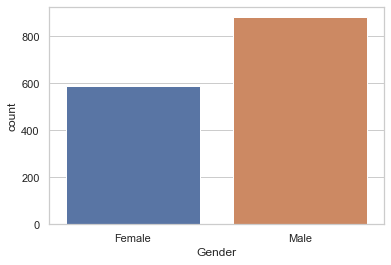

In [39]:
sns.countplot(x="Gender",data=hr)

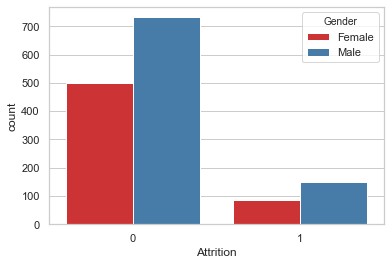

In [40]:
sns.set(style="whitegrid",palette="Set1")
sns.countplot(x="Attrition",hue="Gender",data=hr)

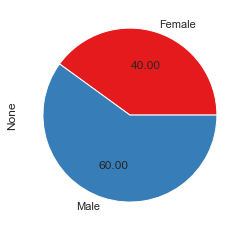

In [41]:
hr.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

In [42]:
hr.JobInvolvement.value_counts(normalize=True)
#1 'Low'
#2 'Medium'
#3 'High'
#4 'Very High'

3    0.590476
2    0.255102
4    0.097959
1    0.056463
Name: JobInvolvement, dtype: float64

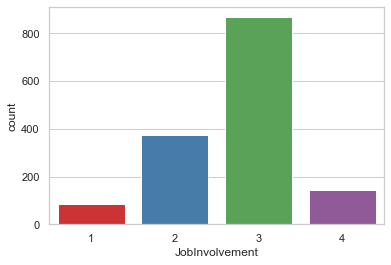

In [43]:
sns.countplot(x="JobInvolvement",data=hr)

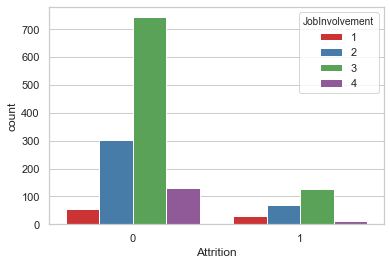

In [44]:
sns.countplot(x="Attrition",hue='JobInvolvement',data=hr)

In [45]:
hr.JobLevel.value_counts(normalize=True)

1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64

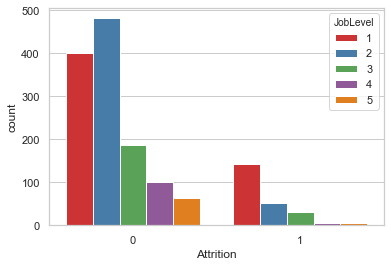

In [46]:
sns.countplot(x="Attrition",hue='JobLevel',data=hr)

In [47]:
hr.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

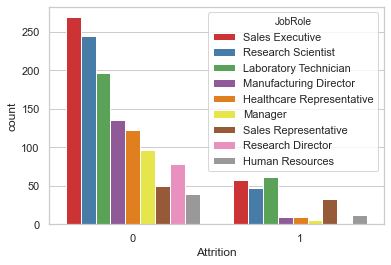

In [48]:
sns.countplot(x="Attrition",hue='JobRole',data=hr)

In [49]:
hr.JobSatisfaction.value_counts(normalize=True)

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64

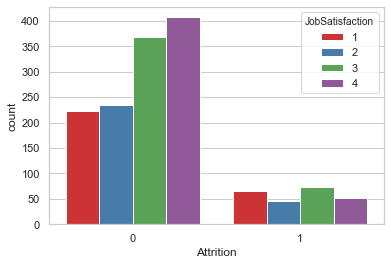

In [50]:
sns.countplot(x="Attrition",hue='JobSatisfaction',data=hr)

In [51]:
hr.MaritalStatus.value_counts(normalize=True)

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

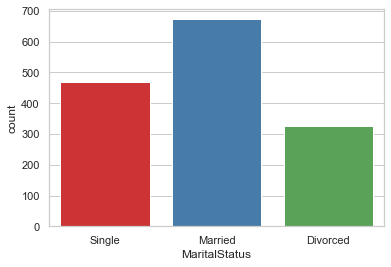

In [52]:
sns.countplot(x="MaritalStatus",data=hr)

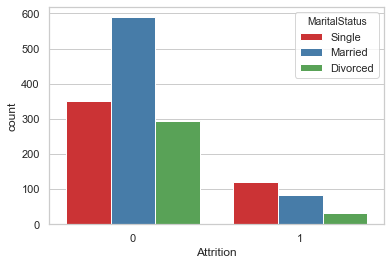

In [53]:
sns.countplot(x="Attrition",hue="MaritalStatus",data=hr)

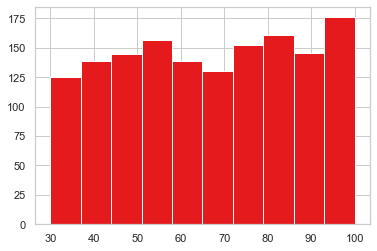

In [54]:
hr.HourlyRate.hist()

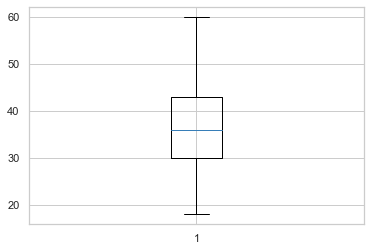

In [55]:
plt.boxplot(hr.Age)
plt.show()

In [56]:
print(hr.MonthlyIncome.skew())
hr.MonthlyIncome.describe()

1.3698166808390662


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

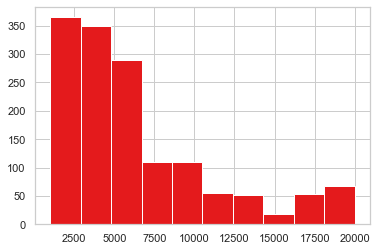

In [57]:
hr.MonthlyIncome.hist()

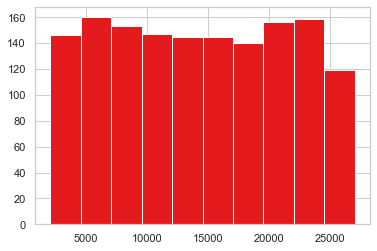

In [58]:
hr.MonthlyRate.hist()

In [59]:
hr.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [60]:
hr.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

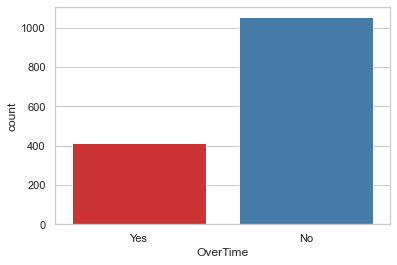

In [61]:
sns.countplot(x="OverTime",data=hr)

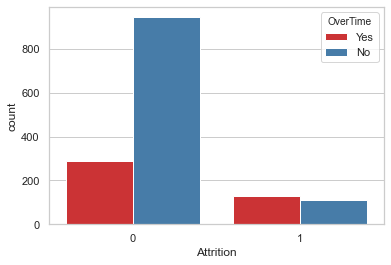

In [62]:
sns.set( style='whitegrid',palette='Set1') 
sns.countplot(x="Attrition",hue="OverTime",data=hr)

In [63]:
hr.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

In [64]:
print(hr.PercentSalaryHike.skew())  
hr.PercentSalaryHike.describe()

0.8211279755780908


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

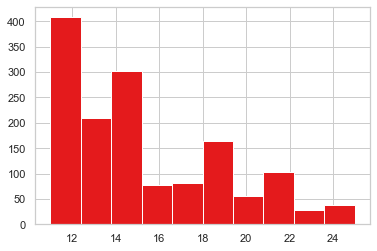

In [65]:
hr.PercentSalaryHike.hist()

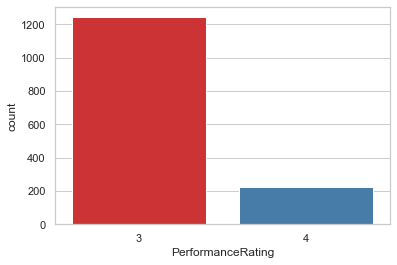

In [66]:
sns.countplot(x="PerformanceRating",data=hr)

In [67]:
hr.PerformanceRating.value_counts(normalize=True)

3    0.846259
4    0.153741
Name: PerformanceRating, dtype: float64

In [68]:
hr.RelationshipSatisfaction.value_counts(normalize=True)

3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: RelationshipSatisfaction, dtype: float64

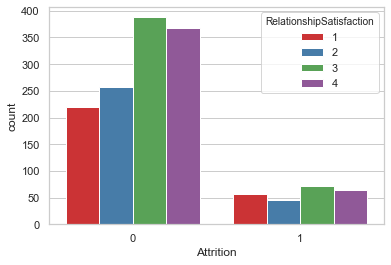

In [69]:
sns.set( style='whitegrid',palette='Set1') 
sns.countplot(x="Attrition",hue="RelationshipSatisfaction",data=hr)

In [70]:
hr.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [71]:
hr.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

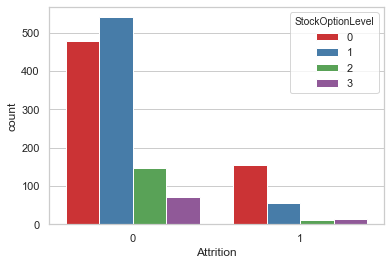

In [72]:
sns.countplot(x="Attrition",hue="StockOptionLevel",data=hr)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

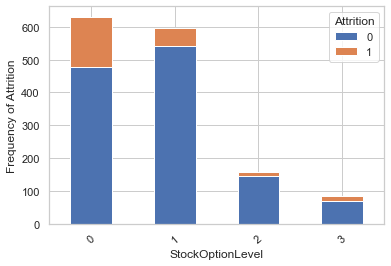

In [73]:
sns.set(style="whitegrid")
pd.crosstab(hr.StockOptionLevel,hr.Attrition).plot(kind='bar', stacked=True)

plt.xlabel('StockOptionLevel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

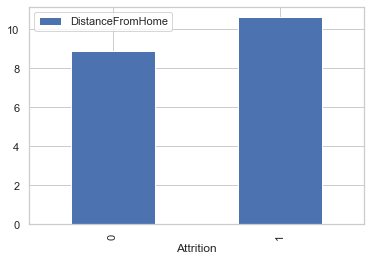

In [74]:
hr.groupby(['Attrition']).agg({'DistanceFromHome': 'mean'}).plot(kind="bar", stacked= True)

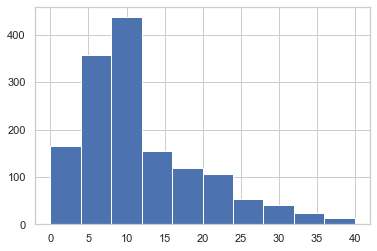

In [75]:
hr.TotalWorkingYears.hist()

In [76]:
hr.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [77]:
hr.WorkLifeBalance.value_counts()


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

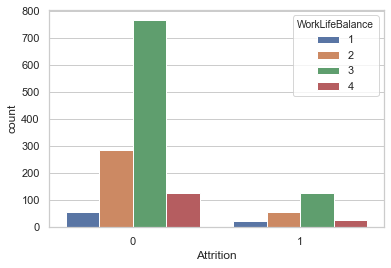

In [78]:
sns.countplot(x="Attrition",hue="WorkLifeBalance",data=hr)

In [79]:
hr.WorkLifeBalance.value_counts(normalize=True)

3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: WorkLifeBalance, dtype: float64

In [80]:
print(hr.YearsInCurrentRole.skew())
hr.YearsInCurrentRole.describe()

0.9173631562908262


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

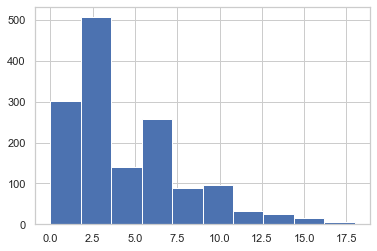

In [81]:
hr.YearsInCurrentRole.hist()

In [82]:
print(hr.YearsSinceLastPromotion.skew())
hr.YearsSinceLastPromotion.describe()

1.9842899833524859


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

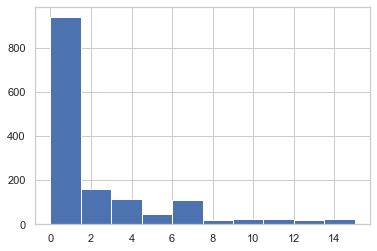

In [83]:
hr.YearsSinceLastPromotion.hist()

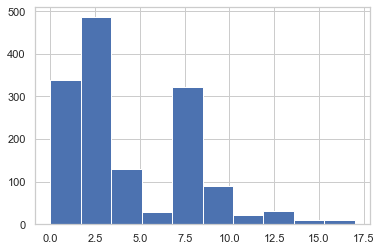

In [84]:
hr.YearsWithCurrManager.hist()

# BIVARIATE ANALYSIS

# Attrition VS Age

In [85]:
import scipy.stats as stats
from scipy.stats import ttest_ind    

In [86]:
hr.groupby(['Attrition']).agg({'Age': 'mean'})

,Age
Attrition,
0,37.561233
1,33.607595


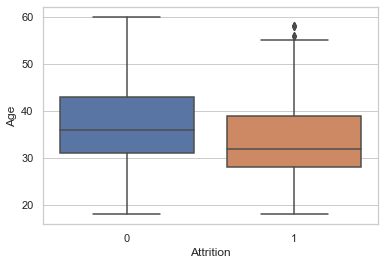

In [87]:
sns.boxplot(x='Attrition',y="Age",data=hr)

In [88]:
cat1 = hr[hr['Attrition']==0]
cat2 = hr[hr['Attrition']==1]

ttest_ind(cat1['Age'], cat2['Age'])
#h0:b1=0(x var is not significant)
#h1:b1!=0(x var is significant)
#check p value(0.00) <0.05 -H0 rejected
#There is significant association between age and Attrition
# Age is significant var

Ttest_indResult(statistic=6.1786638353072165, pvalue=8.356308021103649e-10)

# Attrition VS BusinessTravel

In [89]:
x1=pd.crosstab(hr["Attrition"],hr["BusinessTravel"])
print(x1)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156


In [90]:
stats.chi2_contingency(x1) 

(24.182413685655174,
 5.608614476449931e-06,
 2,
 array([[125.81632653, 232.34081633, 874.84285714],
        [ 24.18367347,  44.65918367, 168.15714286]]))

# Attrition VS DailyRate

In [91]:
cat1 = hr[hr['Attrition']==0]
cat2 = hr[hr['Attrition']==1]
ttest_ind(cat1['DailyRate'], cat2['DailyRate'])

Ttest_indResult(statistic=2.1740836777017747, pvalue=0.02985816066026497)

# Attrition VS Department

In [92]:
x2=pd.crosstab(hr["Attrition"],hr["Department"])
print(x2)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92


In [93]:
stats.chi2_contingency(x2)

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

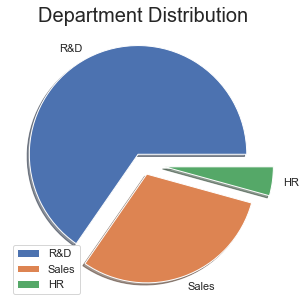

In [94]:
labels = ['R&D', 'Sales', 'HR']
sizes = hr['Department'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(sizes, labels = labels,  explode = explode, shadow = True)
plt.title('Department Distribution', fontsize = 20)
plt.legend()
plt.show()

# Attrition VS DistanceFromHome

In [95]:
ttest_ind(cat1['DistanceFromHome'], cat2['DistanceFromHome'])

Ttest_indResult(statistic=-2.994708098265125, pvalue=0.0027930600802134266)

# Attrition VS Education

In [96]:
ttest_ind(cat1['Education'], cat2['Education'])

Ttest_indResult(statistic=1.202625515508589, pvalue=0.2293152033223043)

# Attrition VS EducationField

In [97]:
x3=pd.crosstab(hr["Attrition"],hr["EducationField"])
print

<function print>

In [98]:
stats.chi2_contingency(x3) 

(16.024674119585423,
 0.006773980139025222,
 5,
 array([[ 22.64693878, 508.29795918, 133.36530612, 389.19183673,
          68.77959184, 110.71836735],
        [  4.35306122,  97.70204082,  25.63469388,  74.80816327,
          13.22040816,  21.28163265]]))

# Attrition VS EmployeeNumber

In [99]:
ttest_ind(cat1['EmployeeNumber'], cat2['EmployeeNumber'])

Ttest_indResult(statistic=0.4052843139019291, pvalue=0.6853275897297122)

# Attrition VS EnvironmentSatisfaction

In [100]:
x4=pd.crosstab(hr["Attrition"],hr["EnvironmentSatisfaction"])
print(x4)

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
0                        212  244  391  386
1                         72   43   62   60


In [101]:
stats.chi2_contingency(x4)

(22.503881435842295,
 5.1234689062894205e-05,
 3,
 array([[238.2122449 , 240.72857143, 379.96530612, 374.09387755],
        [ 45.7877551 ,  46.27142857,  73.03469388,  71.90612245]]))

# Attrition VS Gender 

In [102]:
x5=pd.crosstab(hr["Attrition"],hr["Gender"])
print(x5)

Gender     Female  Male
Attrition              
0             501   732
1              87   150


In [103]:
stats.chi2_contingency(x5)

(1.1169671241970975, 0.29057244902890855, 1, array([[493.2, 739.8],
        [ 94.8, 142.2]]))

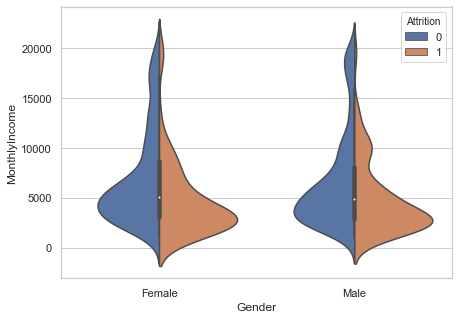

In [104]:
fig,ax = plt.subplots(figsize=(7,5))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=hr)


# Attrition VS HourlyRate

In [105]:
ttest_ind(cat1['HourlyRate'], cat2['HourlyRate'])

Ttest_indResult(statistic=0.26228987349264493, pvalue=0.7931347689944243)

# Attrition VS JobInvolvement

In [106]:
x6=pd.crosstab(hr["Attrition"],hr["JobInvolvement"])
print(x6)

JobInvolvement   1    2    3    4
Attrition                        
0               55  304  743  131
1               28   71  125   13


In [107]:
stats.chi2_contingency(x6)

(28.492021234659283,
 2.8631806367134195e-06,
 3,
 array([[ 69.61836735, 314.54081633, 728.05714286, 120.78367347],
        [ 13.38163265,  60.45918367, 139.94285714,  23.21632653]]))

# Attrition VS JobLevel

In [108]:
x7=pd.crosstab(hr["Attrition"],hr["JobLevel"])
print(x7)

JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5


In [109]:
stats.chi2_contingency(x7)

(72.52901310667391,
 6.634684715458909e-15,
 4,
 array([[455.45510204, 447.90612245, 182.85306122,  88.91020408,
          57.8755102 ],
        [ 87.54489796,  86.09387755,  35.14693878,  17.08979592,
          11.1244898 ]]))

# Attrition VS JobRole

In [110]:
x8=pd.crosstab(hr["Attrition"],hr["JobRole"])
print(x8)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
0                                122               40                    197   
1                                  9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
0               97                     135                 78   
1                5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
0                         245              269                    50  
1                          47               57                    33  


In [111]:
stats.chi2_contingency(x8)

(86.19025367670434,
 2.752481638050657e-15,
 8,
 array([[109.87959184,  43.61632653, 217.24285714,  85.55510204,
         121.62244898,  67.10204082, 244.92244898, 273.44081633,
          69.61836735],
        [ 21.12040816,   8.38367347,  41.75714286,  16.44489796,
          23.37755102,  12.89795918,  47.07755102,  52.55918367,
          13.38163265]]))

# Attrition VS JobSatisfaction

In [112]:
x9=pd.crosstab(hr["Attrition"],hr["JobSatisfaction"])
print(x9)

JobSatisfaction    1    2    3    4
Attrition                          
0                223  234  369  407
1                 66   46   73   52


In [113]:
stats.chi2_contingency(x9)

(17.505077010348,
 0.0005563004510387556,
 3,
 array([[242.40612245, 234.85714286, 370.73877551, 384.99795918],
        [ 46.59387755,  45.14285714,  71.26122449,  74.00204082]]))

# Attrition VS MaritalStatus

In [114]:
x9=pd.crosstab(hr["Attrition"],hr["MaritalStatus"])
print(x9)

MaritalStatus  Divorced  Married  Single
Attrition                               
0                   294      589     350
1                    33       84     120


In [115]:
stats.chi2_contingency(x9)

(46.163676540848705,
 9.45551106034083e-11,
 2,
 array([[274.27959184, 564.49591837, 394.2244898 ],
        [ 52.72040816, 108.50408163,  75.7755102 ]]))

# Attrition VS MonthlyIncome

In [116]:
ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])

Ttest_indResult(statistic=6.203935765608938, pvalue=7.14736398535381e-10)

# Attrition VS MonthlyRate

In [117]:
ttest_ind(cat1['MonthlyRate'], cat2['MonthlyRate'])

Ttest_indResult(statistic=-0.5813058211545318, pvalue=0.5611235982243015)

# Attrition VS NumCompaniesWorked

In [118]:
ttest_ind(cat1['NumCompaniesWorked'], cat2['NumCompaniesWorked'])

Ttest_indResult(statistic=-1.6680187953544354, pvalue=0.0955252620565195)

# Attrition VS Over18-ins

In [119]:
x10=pd.crosstab(hr["Attrition"],hr["Over18"])
print(x10)

Over18        Y
Attrition      
0          1233
1           237


In [120]:
stats.chi2_contingency(x10)

(0.0, 1.0, 0, array([[1233.],
        [ 237.]]))

# Attrition VS OverTime

In [121]:
x11=pd.crosstab(hr["Attrition"],hr["OverTime"])
print(x11)

OverTime    No  Yes
Attrition          
0          944  289
1          110  127


In [122]:
stats.chi2_contingency(x11)

(87.56429365828768,
 8.15842372153832e-21,
 1,
 array([[884.06938776, 348.93061224],
        [169.93061224,  67.06938776]]))

# Attrition VS PercentSalaryHike

In [123]:
ttest_ind(cat1['PercentSalaryHike'], cat2['PercentSalaryHike'])

Ttest_indResult(statistic=0.5164573250747643, pvalue=0.6056128238893757)

# Attrition VS PerformanceRating

In [124]:
x11=pd.crosstab(hr["Attrition"],hr["PerformanceRating"])
print(x11)

PerformanceRating     3    4
Attrition                   
0                  1044  189
1                   200   37


In [125]:
stats.chi2_contingency(x11)

(0.00015475439428271534,
 0.9900745465934576,
 1,
 array([[1043.43673469,  189.56326531],
        [ 200.56326531,   36.43673469]]))

# Attrition VS RelationshipSatisfaction-

In [126]:
x12=pd.crosstab(hr["Attrition"],hr["RelationshipSatisfaction"])
print(x12)

RelationshipSatisfaction    1    2    3    4
Attrition                                   
0                         219  258  388  368
1                          57   45   71   64


In [127]:
stats.chi2_contingency(x12)

(5.241067859713708,
 0.1549724437105263,
 3,
 array([[231.50204082, 254.14897959, 384.99795918, 362.35102041],
        [ 44.49795918,  48.85102041,  74.00204082,  69.64897959]]))

# Attrition VS StandardHours

In [128]:
ttest_ind(cat1['StandardHours'], cat2['StandardHours'])

C:\Users\RakeshS\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\RakeshS\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\RakeshS\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=nan, pvalue=nan)

# Attrition VS StockOptionLevel

In [129]:
x14=pd.crosstab(hr["Attrition"],hr["StockOptionLevel"])
print(x14)

StockOptionLevel    0    1    2   3
Attrition                          
0                 477  540  146  70
1                 154   56   12  15


In [130]:
stats.chi2_contingency(x14)

(60.59830108612225,
 4.379390336108354e-13,
 3,
 array([[529.26734694, 499.91020408, 132.52653061,  71.29591837],
        [101.73265306,  96.08979592,  25.47346939,  13.70408163]]))

# Attrition VS TotalWorkingYears

In [131]:
ttest_ind(cat1['TotalWorkingYears'], cat2['TotalWorkingYears'])

Ttest_indResult(statistic=6.6522546135024445, pvalue=4.0618781112668525e-11)

# Attrition VS TrainingTimesLastYear

In [132]:
ttest_ind(cat1['TrainingTimesLastYear'], cat2['TrainingTimesLastYear'])

Ttest_indResult(statistic=2.2829029923666897, pvalue=0.02257849973720126)

# Attrition VS WorkLifeBalance

In [133]:
x15=pd.crosstab(hr["Attrition"],hr["WorkLifeBalance"])
print(x15)

WorkLifeBalance   1    2    3    4
Attrition                         
0                55  286  766  126
1                25   58  127   27


In [134]:
stats.chi2_contingency(x15)

(16.3250970916474,
 0.0009725698845348824,
 3,
 array([[ 67.10204082, 288.53877551, 749.02653061, 128.33265306],
        [ 12.89795918,  55.46122449, 143.97346939,  24.66734694]]))

In [135]:
# Attrition VS YearsAtCompany

In [136]:
ttest_ind(cat1['YearsAtCompany'], cat2['YearsAtCompany'])

Ttest_indResult(statistic=5.1963086670254235, pvalue=2.3188716103863033e-07)

# Attrition VS YearsInCurrentRole

In [137]:
ttest_ind(cat1['YearsInCurrentRole'], cat2['YearsInCurrentRole'])

Ttest_indResult(statistic=6.232038413295282, pvalue=6.003185843641377e-10)

# Attrition VS YearsSinceLastPromotion

In [138]:
ttest_ind(cat1['YearsSinceLastPromotion'], cat2['YearsSinceLastPromotion'])

Ttest_indResult(statistic=1.2657876620135298, pvalue=0.2057899591624936)

# Attrition VS YearsWithCurrManager

In [139]:
ttest_ind(cat1['YearsWithCurrManager'], cat2['YearsWithCurrManager'])

Ttest_indResult(statistic=6.059068531868998, pvalue=1.7369867845242207e-09)

# Model Building

In [140]:
y=hr.iloc[ : , :1]  #index 0 is attrition age is index 1
x=hr.iloc[ : , 1:]

In [141]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [142]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [143]:
#dropping the insignificant variables.
x.drop(['Education','EmployeeCount','EmployeeNumber', 'Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'],axis=1,inplace=True)

In [144]:
x.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,2,3,2,Sales Executive,...,Single,5993,Yes,0,8,0,1,6,4,5


# get_dumies

In [145]:
x2 = pd.get_dummies(x, columns=['BusinessTravel','Department','EducationField','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','StockOptionLevel','WorkLifeBalance'])

In [146]:
x2.shape

(1470, 60)

In [147]:
x2.tail(2)

,Age,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Non-Travel,...,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
1468,49,1023,2,5390,17,3,9,6,8,0,...,1,0,1,0,0,0,0,1,0,0
1469,34,628,8,4404,6,3,4,3,2,0,...,1,0,1,0,0,0,0,0,0,1


# Dropping extra var in dummy (n-1)

In [148]:
x2.shape

(1470, 60)

In [149]:
#take (n-1) number of dummy variables where n is the number of levels in the categorical column
x2.drop(['BusinessTravel_Non-Travel'],axis=1,inplace=True)
x2.drop(['Department_Sales'],axis=1,inplace=True)
x2.drop(['EducationField_Other'],axis=1,inplace=True)
x2.drop(['EnvironmentSatisfaction_1'],axis=1,inplace=True)
x2.drop(['JobInvolvement_1'],axis=1,inplace=True)
x2.drop(['JobLevel_1'],axis=1,inplace=True)
x2.drop(['JobRole_Healthcare Representative'],axis=1,inplace=True)
x2.drop(['JobSatisfaction_1'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Divorced'],axis=1,inplace=True)
x2.drop(['StockOptionLevel_0'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_1'],axis=1,inplace=True)
x2.drop(['OverTime_No'],axis=1,inplace=True)

In [150]:
x2.shape

(1470, 48)

# MULTICOLLINEARITY

In [151]:
x2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
    

# Spliting Train and Test Data Set

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)

In [153]:
x_train.shape

(1176, 48)

In [154]:
x_test.shape

(294, 48)

In [155]:
y_train.shape

(1176, 1)

In [156]:
y_test.shape

(294, 1)

# Logistic Regression Model

In [157]:
model=sm.Logit(y_train,x_train)
result=model.fit()

         Current function value: 0.282175
         Iterations: 35


C:\Users\RakeshS\python\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [158]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1128
Method:                           MLE   Df Model:                           47
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.3599
Time:                        22:00:27   Log-Likelihood:                -331.84
converged:                      False   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 2.402e-52
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0007      0.014     -0.050      0.960      -0.029       0.027
DailyRate                            -0.0006      0.000     -2.367      0.018      -0.001      -0.000
DistanceFromHome                      0.0559      0.012      4.533      0.000       0.032       0.080
MonthlyIncome                     -9.644e-05   9.81e-05     -0.983      0.326      -0.000    9.58e-05
TotalWorkingYears                    -0.0399      0.031     -1.288      0.198      -0.101       0.021
TrainingTimesLastYear                -0.1813      0.085     -2.145      0.032      -0.347      -0.016
YearsAtCompany                        0.0823      0.042      1.953      0.051      -0.000       0.165
YearsInCurrentRole                   -0.0674      0.057     -1.190      0.234      -0.178       0.044
YearsWithCurrManager                 -0.1323      0.054     -2.449      0.014      -0.238      -0.026
BusinessTravel_Travel_Frequently      1.9680      0.477      4.130      0.000       1.034       2.902
BusinessTravel_Travel_Rarely          0.9966      0.441      2.260      0.024       0.132       1.861
Department_Human Resources          -28.0879   1.93e+06  -1.46e-05      1.000   -3.78e+06    3.78e+06
Department_Research & Development     1.8217      1.019      1.787      0.074      -0.176       3.820
EducationField_Human Resources        2.0089      1.050      1.913      0.056      -0.050       4.068
EducationField_Life Sciences          0.2479      0.481      0.515      0.606      -0.695       1.191
EducationField_Marketing              0.4540      0.564      0.805      0.421      -0.652       1.560
EducationField_Medical                0.1201      0.493      0.244      0.807      -0.845       1.086
EducationField_Technical Degree       1.4953      0.547      2.736      0.006       0.424       2.566
EnvironmentSatisfaction_2            -0.8731      0.312     -2.798      0.005      -1.485      -0.261
EnvironmentSatisfaction_3            -1.1223      0.300     -3.744      0.000      -1.710      -0.535
EnvironmentSatisfaction_4            -1.1503      0.294     -3.912      0.000      -1.727      -0.574
JobInvolvement_2                     -1.1794      0.394     -2.990      0.003      -1.953      -0.406
JobInvolvement_3                     -1.3487      0.366     -3.680      0.000      -2.067      -0.630
JobInvolvement_4                     -1.9423      0.517     -3.755      0.000      -2.956      -0.929
JobLevel_2                           -1.5768      0.504     -3.126      0.002      -2.565      -0.588
JobLevel_3                           -0.1648      0.767     -0.215      0.830      -1.668       1.339
JobLevel_4                           -0.5948      1.337     -0.445      0.656      -3.215       2.025
JobLevel_5                            2.0059      1.720      1.166      0.244      -1.365       5.377
JobRole_Human Resources              29.8384   1.93e+06   1.55e-05      1.000  

In [159]:
# Again check for p-value, drop if p-value is greater than 0.05 and rerun the model
x2.drop(['Age'],axis=1,inplace=True)
x2.drop(['MonthlyIncome'],axis=1,inplace=True)
x2.drop(['TotalWorkingYears'],axis=1,inplace=True)
x2.drop(['YearsInCurrentRole'],axis=1,inplace=True)
x2.drop(['YearsAtCompany'],axis=1,inplace=True)
x2.drop(['Department_Human Resources'],axis=1,inplace=True)
x2.drop(['Department_Research & Development'],axis=1,inplace=True)
x2.drop(['EducationField_Human Resources'],axis=1,inplace=True)
x2.drop(['EducationField_Life Sciences'],axis=1,inplace=True)
x2.drop(['EducationField_Marketing'],axis=1,inplace=True)
x2.drop(['EducationField_Medical'],axis=1,inplace=True)
x2.drop(['JobLevel_3'],axis=1,inplace=True)
x2.drop(['JobLevel_4'],axis=1,inplace=True)
x2.drop(['JobLevel_5'],axis=1,inplace=True)
x2.drop(['JobRole_Human Resources'],axis=1,inplace=True)
x2.drop(['JobRole_Laboratory Technician'],axis=1,inplace=True)
x2.drop(['JobRole_Manager'],axis=1,inplace=True)
x2.drop(['JobRole_Manufacturing Director'],axis=1,inplace=True)
x2.drop(['JobRole_Research Director'],axis=1,inplace=True)
x2.drop(['JobRole_Research Scientist'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Married'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Single'],axis=1,inplace=True)
x2.drop(['StockOptionLevel_3'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_2'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_4'],axis=1,inplace=True)

In [160]:
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.312793
         Iterations 7


In [161]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1153
Method:                           MLE   Df Model:                           22
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.2905
Time:                        22:00:36   Log-Likelihood:                -367.84
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 6.988e-51
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DailyRate                           -0.0006      0.000     -2.444      0.015      -0.001      -0.000
DistanceFromHome                     0.0508      0.011      4.588      0.000       0.029       0.073
TrainingTimesLastYear               -0.1146      0.076     -1.515      0.130      -0.263       0.034
YearsWithCurrManager                -0.1419      0.030     -4.659      0.000      -0.202      -0.082
BusinessTravel_Travel_Frequently     2.1457      0.415      5.170      0.000       1.332       2.959
BusinessTravel_Travel_Rarely         1.2505      0.372      3.360      0.001       0.521       1.980
EducationField_Technical Degree      1.0841      0.296      3.661      0.000       0.504       1.664
EnvironmentSatisfaction_2           -0.7410      0.287     -2.581      0.010      -1.304      -0.178
EnvironmentSatisfaction_3           -0.9904      0.271     -3.651      0.000      -1.522      -0.459
EnvironmentSatisfaction_4           -0.9320      0.265     -3.523      0.000      -1.451      -0.413
JobInvolvement_2                    -0.8885      0.343     -2.592      0.010      -1.560      -0.217
JobInvolvement_3                    -1.0940      0.318     -3.441      0.001      -1.717      -0.471
JobInvolvement_4                    -1.6509      0.468     -3.526      0.000      -2.569      -0.733
JobLevel_2                          -1.1386      0.252     -4.518      0.000      -1.633      -0.645
JobRole_Sales Executive              1.1650      0.259      4.501      0.000       0.658       1.672
JobRole_Sales Representative         1.4096      0.335      4.211      0.000       0.754       2.066
JobSatisfaction_2                   -0.7073      0.296     -2.387      0.017      -1.288      -0.127
JobSatisfaction_3                   -0.5203      0.250     -2.077      0.038      -1.011      -0.029
JobSatisfaction_4                   -1.0918      0.268     -4.071      0.000      -1.617      -0.566
OverTime_Yes                         1.7244      0.200      8.607      0.000       1.332       2.117
StockOptionLevel_1                  -1.2621      0.215     -5.859      0.000      -1.684      -0.840
StockOptionLevel_2                  -1.2838      0.389     -3.303      0.001      -2.045      -0.522
WorkLifeBalance_3                   -0.5685      0.191     -2.984      0.003      -0.942      -0.195
====================================================================================================
"""

In [162]:
x2.drop(['TrainingTimesLastYear'],axis=1,inplace=True)

In [163]:
# again train model
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.313788
         Iterations 7


In [164]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1154
Method:                           MLE   Df Model:                           21
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.2882
Time:                        22:01:05   Log-Likelihood:                -369.01
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 5.436e-51
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DailyRate                           -0.0006      0.000     -2.571      0.010      -0.001      -0.000
DistanceFromHome                     0.0497      0.011      4.507      0.000       0.028       0.071
YearsWithCurrManager                -0.1415      0.030     -4.672      0.000      -0.201      -0.082
BusinessTravel_Travel_Frequently     1.9925      0.395      5.045      0.000       1.218       2.767
BusinessTravel_Travel_Rarely         1.0942      0.350      3.130      0.002       0.409       1.779
EducationField_Technical Degree      1.0668      0.297      3.595      0.000       0.485       1.648
EnvironmentSatisfaction_2           -0.7670      0.286     -2.684      0.007      -1.327      -0.207
EnvironmentSatisfaction_3           -1.0083      0.270     -3.733      0.000      -1.538      -0.479
EnvironmentSatisfaction_4           -0.9493      0.263     -3.609      0.000      -1.465      -0.434
JobInvolvement_2                    -0.9632      0.338     -2.852      0.004      -1.625      -0.301
JobInvolvement_3                    -1.1667      0.312     -3.737      0.000      -1.779      -0.555
JobInvolvement_4                    -1.7209      0.464     -3.712      0.000      -2.630      -0.812
JobLevel_2                          -1.1563      0.252     -4.594      0.000      -1.650      -0.663
JobRole_Sales Executive              1.1502      0.258      4.459      0.000       0.645       1.656
JobRole_Sales Representative         1.3829      0.334      4.134      0.000       0.727       2.038
JobSatisfaction_2                   -0.7375      0.295     -2.501      0.012      -1.315      -0.160
JobSatisfaction_3                   -0.5530      0.248     -2.227      0.026      -1.040      -0.066
JobSatisfaction_4                   -1.1257      0.267     -4.223      0.000      -1.648      -0.603
OverTime_Yes                         1.7327      0.200      8.652      0.000       1.340       2.125
StockOptionLevel_1                  -1.2582      0.215     -5.851      0.000      -1.680      -0.837
StockOptionLevel_2                  -1.3154      0.389     -3.379      0.001      -2.078      -0.552
WorkLifeBalance_3                   -0.5857      0.189     -3.091      0.002      -0.957      -0.214
====================================================================================================
"""

In [165]:
x_train['pred_prob']=result.predict(x_train)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 1. Confusion Matrix for Train data

In [166]:
x_train["pred_class_train"]=np.where(x_train["pred_prob"]>0.2,1,0)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
x_train.head(2)

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,...,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3,pred_prob,pred_class_train
38,852,5,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0.399928,1
907,1099,5,10,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0.005363,0


In [168]:
HR=pd.crosstab(y_train["Attrition"],x_train["pred_class_train"])  #confusion table actual vs predicted
print(HR)

pred_class_train    0    1
Attrition                 
0                 810  177
1                  51  138


In [169]:
# Sensitivity (Predicting Yes (1) as Yes)
138/(138+51)

0.7301587301587301

In [170]:
#Specificity (Predicting No(0) as No)
810/(810+177)

0.8206686930091185

In [171]:
#accuracy
(810+138)/(1176)

0.8061224489795918

#  ROC Curve Train data

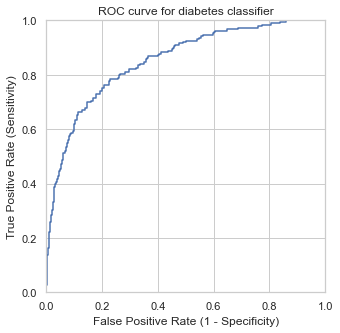

In [172]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train['Attrition'], x_train['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [173]:
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['pred_class_train']))

0.7754137115839244


# KS STATISTICS for Train data


In [174]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum() 
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [175]:
x_train['Attrition']=y_train['Attrition']

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
mydf = ks(data=x_train,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.439639  0.970221      79         39     41.80%         3.95%   
2       0.283659  0.434604      45         72     23.81%         7.29%   
3       0.174185  0.282360      20         98     10.58%         9.93%   
4       0.115475  0.172786      11        106      5.82%        10.74%   
5       0.079123  0.115447      12        106      6.35%        10.74%   
6       0.049404  0.079078       8        109      4.23%        11.04%   
7       0.033529  0.049348       7        111      3.70%        11.25%   
8       0.020456  0.033469       3        114      1.59%        11.55%   
9       0.010744  0.020400       4        114      2.12%        11.55%   
10      0.000484  0.010670       0        118      0.00%        11.96%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             41.80

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Validation forTest Data

In [177]:
x_test['pred_prob']=result.predict(x_test)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
x_test.head(2)

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,...,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3,pred_prob
405,688,3,2,0,...,1,0,1,0.079568
272,1158,9,4,0,...,1,0,0,0.014859


# Validate Model
# Confusion matrix

In [179]:
x_test['y_pred_class_test']=np.where(x_test['pred_prob']>=0.2,1,0)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
HR=pd.crosstab(y_test['Attrition'],x_test['y_pred_class_test'])
print(HR)

y_pred_class_test    0   1
Attrition                 
0                  203  43
1                   16  32


In [181]:
# Sensitivity
32/(16+32)

0.6666666666666666

In [182]:
#Specificity (Predicting No(0) as No)
203/(203+43)

0.8252032520325203

In [183]:
#accuracy
(203+32)/(240+6+31+17)

0.7993197278911565

#  ROC Curve for Test Data

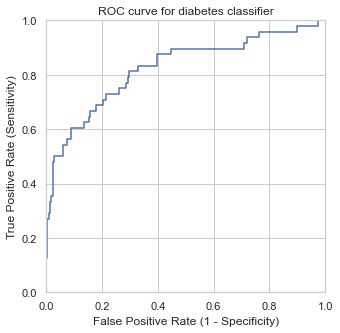

In [184]:
import sklearn
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test['Attrition'], x_test['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [185]:
print(sklearn.metrics.roc_auc_score(y_test['Attrition'], x_test['y_pred_class_test']))

0.7459349593495934


# KS STATISTICS for Test Data

In [186]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [187]:
x_test['Attrition']=y_test['Attrition']

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
mydf_test = ks(data=x_test,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.424747  0.911242      23          7     47.92%         2.85%   
2       0.262449  0.419284       6         23     12.50%         9.35%   
3       0.178100  0.261014       6         23     12.50%         9.35%   
4       0.119532  0.177949       4         26      8.33%        10.57%   
5       0.069472  0.117820       3         26      6.25%        10.57%   
6       0.041387  0.068175       1         28      2.08%        11.38%   
7       0.026637  0.040543       0         30      0.00%        12.20%   
8       0.013223  0.025408       3         26      6.25%        10.57%   
9       0.007867  0.013073       0         29      0.00%        11.79%   
10      0.001167  0.007529       2         28      4.17%        11.38%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             47.92

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Model Improvisation

In [189]:
hr.head()

,Attrition,Age,BusinessTravel,DailyRate,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,...,6,4,0,5
1,0,49,Travel_Frequently,279,...,10,7,1,7
2,1,37,Travel_Rarely,1373,...,0,0,0,0
3,0,33,Travel_Frequently,1392,...,8,7,3,0
4,0,27,Travel_Rarely,591,...,2,2,2,2


In [190]:
hr.drop(['Education','EmployeeCount','EmployeeNumber', 'Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'],axis=1,inplace=True)

In [191]:
hr.head(2)

,Attrition,Age,BusinessTravel,DailyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,...,1,6,4,5
1,0,49,Travel_Frequently,279,...,3,10,7,7


In [192]:
hr.shape

(1470, 22)

In [193]:
y=hr.iloc[:,:-21]
x=hr.iloc[:,1:22]

In [194]:
x3 = pd.get_dummies(x) 
x3.shape

(1470, 41)

In [195]:
x3.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales

In [196]:
x3 = x3.drop(["BusinessTravel_Non-Travel"], axis=1)
x3 = x3.drop(["Department_Sales"], axis=1)
x3 = x3.drop(["EducationField_Medical"], axis=1)
x3 = x3.drop(["JobRole_Manager"], axis=1)
x3 = x3.drop(["MaritalStatus_Single"], axis=1)
x3 = x3.drop(["OverTime_No"], axis=1)

In [197]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [198]:
import statsmodels.formula.api as sm
#Calculating VIF values using that function
vif_cal(input_data=x3)
from statsmodels.stats.outliers_influence import variance_inflation_factor

Age  VIF =  2.0
DailyRate  VIF =  1.03
DistanceFromHome  VIF =  1.02
EnvironmentSatisfaction  VIF =  1.02
JobInvolvement  VIF =  1.03
JobLevel  VIF =  14.07
JobSatisfaction  VIF =  1.01
MonthlyIncome  VIF =  17.97
StockOptionLevel  VIF =  1.9
TotalWorkingYears  VIF =  4.77
TrainingTimesLastYear  VIF =  1.03
WorkLifeBalance  VIF =  1.03
YearsAtCompany  VIF =  4.23
YearsInCurrentRole  VIF =  2.73
YearsWithCurrManager  VIF =  2.84
BusinessTravel_Travel_Frequently  VIF =  2.36
BusinessTravel_Travel_Rarely  VIF =  2.36
Department_Human Resources  VIF =  8.49
Department_Research & Development  VIF =  15.89
EducationField_Human Resources  VIF =  1.8
EducationField_Life Sciences  VIF =  1.39
EducationField_Marketing  VIF =  1.66
EducationField_Other  VIF =  1.13
EducationField_Technical Degree  VIF =  1.2
JobRole_Healthcare Representative  VIF =  5.25
JobRole_Human Resources  VIF =  7.35
JobRole_Laboratory Technician  VIF =  12.22
JobRole_Manufacturing Director  VIF =  5.76
JobRole_Research Di

In [199]:
#Drop the variables if VIF>5
x3 = x3.drop(["JobLevel"], axis=1)
x3 = x3.drop(["MonthlyIncome"], axis=1)
x3 = x3.drop(["Department_Research & Development"], axis=1)
x3 = x3.drop(["JobRole_Laboratory Technician"], axis=1)
x3 = x3.drop(["JobRole_Research Scientist"], axis=1)
x3 = x3.drop(["JobRole_Sales Executive"], axis=1)
x3 = x3.drop(["JobRole_Sales Representative"], axis=1)
x3 = x3.drop(["JobRole_Manufacturing Director"], axis=1)
x3 = x3.drop(["JobRole_Healthcare Representative"], axis=1)
x3 = x3.drop(["Department_Human Resources"], axis=1)

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.2, random_state=11)

In [201]:
import statsmodels.api as sm
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.330353
         Iterations 8


In [202]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1151
Method:                           MLE   Df Model:                           24
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.2507
Time:                        22:06:17   Log-Likelihood:                -388.49
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 1.790e-41
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                  0.0029      0.012      0.243      0.808      -0.021       0.027
DailyRate                           -0.0002      0.000     -0.823      0.411      -0.001       0.000
DistanceFromHome                     0.0493      0.011      4.539      0.000       0.028       0.071
EnvironmentSatisfaction             -0.2723      0.085     -3.218      0.001      -0.438      -0.106
JobInvolvement                      -0.3849      0.121     -3.169      0.002      -0.623      -0.147
JobSatisfaction                     -0.2944      0.082     -3.591      0.000      -0.455      -0.134
StockOptionLevel                    -0.1125      0.165     -0.681      0.496      -0.436       0.211
TotalWorkingYears                   -0.0728      0.023     -3.158      0.002      -0.118      -0.028
TrainingTimesLastYear               -0.0734      0.075     -0.982      0.326      -0.220       0.073
WorkLifeBalance                     -0.1336      0.119     -1.123      0.262      -0.367       0.100
YearsAtCompany                       0.0645      0.036      1.770      0.077      -0.007       0.136
YearsInCurrentRole                  -0.0608      0.049     -1.248      0.212      -0.156       0.035
YearsWithCurrManager                -0.1006      0.050     -2.018      0.044      -0.198      -0.003
BusinessTravel_Travel_Frequently     2.2030      0.450      4.901      0.000       1.322       3.084
BusinessTravel_Travel_Rarely         1.3969      0.417      3.351      0.001       0.580       2.214
EducationField_Human Resources       1.3550      0.755      1.795      0.073      -0.124       2.834
EducationField_Life Sciences         0.2834      0.228      1.241      0.214      -0.164       0.731
EducationField_Marketing             0.7295      0.318      2.292      0.022       0.106       1.353
EducationField_Other                -0.0057      0.438     -0.013      0.990      -0.864       0.852
EducationField_Technical Degree      1.2140      0.319      3.809      0.000       0.589       1.839
JobRole_Human Resources              0.2058      0.564      0.365      0.715      -0.899       1.311
JobRole_Research Director           -1.3718      0.806     -1.702      0.089      -2.952       0.208
MaritalStatus_Divorced              -1.0320      0.361     -2.859      0.004      -1.740      -0.324
MaritalStatus_Married               -0.8295      0.265     -3.136      0.002      -1.348      -0.311
OverTime_Yes                         1.7125      0.193      8.892      0.000       1.335       2.090
====================================================================================================
"""

In [203]:
x3=x3.drop(['Age'],axis=1)
x3 = x3.drop(["DailyRate"], axis=1)
x3 = x3.drop(["StockOptionLevel"], axis=1)
x3 = x3.drop(["EducationField_Human Resources"], axis=1)
x3 = x3.drop(["WorkLifeBalance"], axis=1)
x3 = x3.drop(["TrainingTimesLastYear"], axis=1)
x3 = x3.drop(["YearsAtCompany"], axis=1)
x3 = x3.drop(["YearsInCurrentRole"], axis=1)
x3 = x3.drop(["EducationField_Life Sciences"], axis=1)
x3 = x3.drop(["EducationField_Other"], axis=1)
x3 = x3.drop(["JobRole_Human Resources"], axis=1)
x3 = x3.drop(["JobRole_Research Director"], axis=1)

In [204]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x3,y,test_size=0.2,random_state=11)

In [205]:
x_test.shape

(294, 13)

In [206]:
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.338283
         Iterations 7


In [207]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1163
Method:                           MLE   Df Model:                           12
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.2327
Time:                        22:07:06   Log-Likelihood:                -397.82
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 9.142e-45
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DistanceFromHome                     0.0474      0.011      4.477      0.000       0.027       0.068
EnvironmentSatisfaction             -0.2751      0.080     -3.459      0.001      -0.431      -0.119
JobInvolvement                      -0.4229      0.111     -3.809      0.000      -0.641      -0.205
JobSatisfaction                     -0.3046      0.078     -3.930      0.000      -0.456      -0.153
TotalWorkingYears                   -0.0691      0.016     -4.231      0.000      -0.101      -0.037
YearsWithCurrManager                -0.0731      0.033     -2.232      0.026      -0.137      -0.009
BusinessTravel_Travel_Frequently     1.9635      0.392      5.010      0.000       1.195       2.732
BusinessTravel_Travel_Rarely         1.1496      0.354      3.243      0.001       0.455       1.844
EducationField_Marketing             0.5269      0.281      1.874      0.061      -0.024       1.078
EducationField_Technical Degree      0.9522      0.282      3.378      0.001       0.400       1.505
MaritalStatus_Divorced              -1.1159      0.259     -4.312      0.000      -1.623      -0.609
MaritalStatus_Married               -0.9348      0.202     -4.618      0.000      -1.332      -0.538
OverTime_Yes                         1.6747      0.189      8.858      0.000       1.304       2.045
====================================================================================================
"""

In [208]:
x3 = x3.drop(["EducationField_Marketing"], axis=1)

In [209]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x3,y,test_size=0.2,random_state=11)

In [210]:
x_test.shape

(294, 12)

In [211]:
model=sm.Logit(y_train,x_train)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.339708
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1164
Method:                           MLE   Df Model:                           11
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.2294
Time:                        22:07:43   Log-Likelihood:                -399.50
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 9.533e-45
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DistanceFromHome                     0.0478      0.011      4.534      0.000       0.027       0.069
EnvironmentSatisfaction             -0.2709      0.079     -3.419      0.001      -0.426      -0.116
JobInvolvement                      -0.4227      0.111     -3.816      0.000      -0.640      -0.206
JobSatisfaction                     -0.3053      0.077     -3.945      0.000      -0.457      -0.154
TotalWorkingYears                   -0.0683      0.016     -4.189      0.000      -0.100      -0.036
YearsWithCurrManager                -0.0741      0.033     -2.261      0.024      -0.138      -0.010
BusinessTravel_Travel_Frequently     1.9967      0.393      5.084      0.000       1.227       2.767
BusinessTravel_Travel_Rarely         1.2002      0.354      3.389      0.001       0.506       1.894
EducationField_Technical Degree      0.8872      0.279      3.181      0.001       0.341       1.434
MaritalStatus_Divorced              -1.1029      0.258     -4.275      0.000      -1.609      -0.597
MaritalStatus_Married               -0.9318      0.202     -4.614      0.000      -1.328      -0.536
OverTime_Yes                         1.6732      0.189      8.874      0.000       1.304       2.043
====================================================================================================
"""

In [212]:
x_train['pred_prob']=result.predict(x_train)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
x_train.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,...,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes,pred_prob
38,5,2,2,1,...,0,1,1,0.519683
907,5,2,3,2,...,0,1,0,0.011779
311,7,1,3,1,...,1,0,0,0.044360
77,6,4,3,1,...,0,1,1,0.169521
287,23,4,3,4,...,1,0,0,0.038936


# Validate Model

In [214]:
#1. Confusion Matrix for Train Data

In [215]:
x_train['y_pred_class_train_gp']=np.where(x_train['pred_prob']>=0.2,1,0)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
x_train.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,...,MaritalStatus_Married,OverTime_Yes,pred_prob,y_pred_class_train_gp
38,5,2,2,1,...,1,1,0.519683,1
907,5,2,3,2,...,1,0,0.011779,0
311,7,1,3,1,...,0,0,0.044360,0
77,6,4,3,1,...,1,1,0.169521,0
287,23,4,3,4,...,0,0,0.038936,0


In [217]:
ct=pd.crosstab(y_train['Attrition'],x_train['y_pred_class_train_gp'])
print(ct)

y_pred_class_train_gp    0    1
Attrition                      
0                      805  182
1                       63  126


In [218]:
# Sensitivity 
126/(126+63)

0.6666666666666666

In [219]:
#Specificity (Predicting bad (0) customer as Bad customer)
805/(805+182)

0.8156028368794326

In [220]:
#accuracy
(126+805)/(1176)

0.7916666666666666

# ROC Curve for Train Data

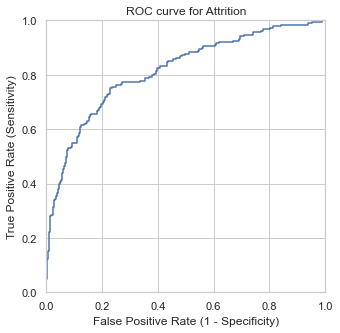

In [221]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train['Attrition'], x_train['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Attrition')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [222]:
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['y_pred_class_train_gp']))

0.7411347517730495


# KS STATISTICS for Train Data

In [223]:
x_train['Attrition']=y_train['Attrition']

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
mydf = ks(data=x_train,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.412670  0.925879      74         44     39.15%         4.46%   
2       0.263717  0.409281      41         76     21.69%         7.70%   
3       0.178589  0.263272      22         96     11.64%         9.73%   
4       0.129858  0.178443       9        108      4.76%        10.94%   
5       0.094199  0.129454      14        104      7.41%        10.54%   
6       0.068351  0.093813       7        110      3.70%        11.14%   
7       0.046931  0.068257       7        111      3.70%        11.25%   
8       0.031092  0.046751       7        110      3.70%        11.14%   
9       0.016768  0.030868       5        113      2.65%        11.45%   
10      0.000918  0.016695       3        115      1.59%        11.65%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             39.15

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Validate model in test dataset

In [226]:
x_test['pred_prob']=result.predict(x_test)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Confusion Matrix for Test Data

In [227]:
x_test['y_pred_class_train_gp']=np.where(x_test['pred_prob']>=0.3,1,0)

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
ct=pd.crosstab(y_test['Attrition'],x_test['y_pred_class_train_gp'])
print(ct)

y_pred_class_train_gp    0   1
Attrition                     
0                      226  20
1                       22  26


In [229]:
# Sensitivity (Predicting good (1) customer as Good customer)
26/(26+22)

0.5416666666666666

In [230]:
#Specificity (Predicting bad (0) customer as Bad customer)
226/(226+26)

0.8968253968253969

In [231]:
#accuracy
(226+26)/(294)

0.8571428571428571

# ROC Curve for Test 

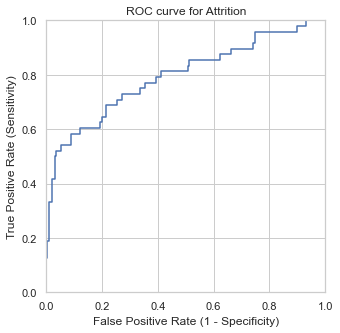

In [232]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test['Attrition'], x_test['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Attrition')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [233]:
print(sklearn.metrics.roc_auc_score(y_test['Attrition'], x_test['y_pred_class_train_gp']))

0.7301829268292682


# KS STATISTICS for Test Data

In [234]:
x_test['Attrition']=y_test['Attrition']

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
mydf = ks(data=x_test,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.421178  0.876945      22          8     45.83%         3.25%   
2       0.270602  0.414634       7         22     14.58%         8.94%   
3       0.175472  0.269929       4         25      8.33%        10.16%   
4       0.132770  0.174801       2         28      4.17%        11.38%   
5       0.086898  0.124702       4         25      8.33%        10.16%   
6       0.067071  0.086849       2         27      4.17%        10.98%   
7       0.043037  0.065688       2         28      4.17%        11.38%   
8       0.028983  0.041713       3         26      6.25%        10.57%   
9       0.013781  0.027437       0         29      0.00%        11.79%   
10      0.001638  0.013745       2         28      4.17%        11.38%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             45.83

C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RakeshS\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
